# Part I: Data Gathering and Preprocessing

### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import collections
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Importing scikit-learn classifiers

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


### Importing Data

In [7]:
video = pd.read_csv("US_youtube_trending_data.csv", header=0)
video.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [8]:
#Drop rows with missing values
cleaned_data = video.dropna()
#Removing Duplicates
video.drop_duplicates(inplace=True)


### Deleting unused columns and renaming the remaining columns

In [9]:
new_columns = ['title', 'categoryId']
new_video = video[new_columns]
new_video.to_csv("new_Usvideos.csv", index=False)
new_video = pd.read_csv("new_Usvideos.csv", header=0, names=['Title', 'Category_ID'])


In [10]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply text preprocessing
new_video['Title'] = new_video['Title'].apply(preprocess_text)

### Importing JSON file

In [11]:
category_json = pd.read_json("US_category_id.JSON")
category_json.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."


### Creating a list of Dictionaries with ID and Category label mapping

In [12]:
category_dict = [{'id': item['id'], 'title': item['snippet']['title']} for item in category_json['items']]
category_dict

[{'id': '1', 'title': 'Film & Animation'},
 {'id': '2', 'title': 'Autos & Vehicles'},
 {'id': '10', 'title': 'Music'},
 {'id': '15', 'title': 'Pets & Animals'},
 {'id': '17', 'title': 'Sports'},
 {'id': '18', 'title': 'Short Movies'},
 {'id': '19', 'title': 'Travel & Events'},
 {'id': '20', 'title': 'Gaming'},
 {'id': '21', 'title': 'Videoblogging'},
 {'id': '22', 'title': 'People & Blogs'},
 {'id': '23', 'title': 'Comedy'},
 {'id': '24', 'title': 'Entertainment'},
 {'id': '25', 'title': 'News & Politics'},
 {'id': '26', 'title': 'Howto & Style'},
 {'id': '27', 'title': 'Education'},
 {'id': '28', 'title': 'Science & Technology'},
 {'id': '29', 'title': 'Nonprofits & Activism'},
 {'id': '30', 'title': 'Movies'},
 {'id': '31', 'title': 'Anime/Animation'},
 {'id': '32', 'title': 'Action/Adventure'},
 {'id': '33', 'title': 'Classics'},
 {'id': '34', 'title': 'Comedy'},
 {'id': '35', 'title': 'Documentary'},
 {'id': '36', 'title': 'Drama'},
 {'id': '37', 'title': 'Family'},
 {'id': '38', '

### Creating a DataFrame for the Dictionary

In [13]:
category_df = pd.DataFrame(category_dict)
categories = category_df.rename(index=str, columns = {"id":"Category_ID","title":"Category"})
categories.head(5)
print(categories.Category)

0          Film & Animation
1          Autos & Vehicles
2                     Music
3            Pets & Animals
4                    Sports
5              Short Movies
6           Travel & Events
7                    Gaming
8             Videoblogging
9            People & Blogs
10                   Comedy
11            Entertainment
12          News & Politics
13            Howto & Style
14                Education
15     Science & Technology
16    Nonprofits & Activism
17                   Movies
18          Anime/Animation
19         Action/Adventure
20                 Classics
21                   Comedy
22              Documentary
23                    Drama
24                   Family
25                  Foreign
26                   Horror
27           Sci-Fi/Fantasy
28                 Thriller
29                   Shorts
30                    Shows
31                 Trailers
Name: Category, dtype: object


# Part II: Training

### Splitting 'title' into string of words using CountVectorizer

In [14]:
vector = CountVectorizer()
counts = vector.fit_transform(new_video['Title'].values)

### Using various classification models and targetting 'Category'

In [58]:
NB_Model = MultinomialNB()
RFC_Model = RandomForestClassifier()
SVC_Model = SVC()
KNC_Model = KNeighborsClassifier()
DTC_Model = DecisionTreeClassifier()


In [16]:
output = new_video['Category_ID'].values

In [17]:
NB_Model.fit(counts,output)

MultinomialNB()

In [18]:
RFC_Model.fit(counts,output)

RandomForestClassifier()

In [16]:
SVC_Model.fit(counts,output)

SVC()

In [17]:
KNC_Model.fit(counts,output)

KNeighborsClassifier()

In [18]:
DTC_Model.fit(counts,output)

DecisionTreeClassifier()

### Checking the accuracy using 90/10 train/test split

In [19]:
from sklearn.decomposition import TruncatedSVD
X = counts
Y = output
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1)

In [20]:
NBtest = MultinomialNB().fit(X_train,Y_train)
nb_predictions= NBtest.predict(X_test)
acc_nb = NBtest.score(X_test, Y_test)
print('The Naive Bayes Algorithm has an accuracy of', acc_nb)
f1 = f1_score(Y_test, nb_predictions, average='weighted')  # Use 'binary' for binary classification
print("F1 Score:", f1)

The Naive Bayes Algorithm has an accuracy of 0.8057274550808757
F1 Score: 0.8038226425299025


In [22]:
RFCtest = RandomForestClassifier().fit(X_train,Y_train)
rfc_predictions = RFCtest.predict(X_test)
acc_rfc = RFCtest.score(X_test, Y_test)
print('The Random Forest Algorithm has an accuracy of', acc_rfc)
f1 = f1_score(Y_test, rfc_predictions, average='weighted')  # Use 'binary' for binary classification
print("F1 Score:", f1)


The Random Forest Algorithm has an accuracy of 0.9941530451111775
F1 Score: 0.9941520050750988


In [22]:
SVCtest = SVC().fit(X_train,Y_train)
svc_predictions = SVCtest.predict(X_test)
acc_svc = SVCtest.score(X_test, Y_test)
print('The Support Vector Algorithm has an accuracy of', acc_svc)
f1 = f1_score(Y_test, svc_predictions, average='weighted')  # Use 'binary' for binary classification
print("F1 Score:", f1)

The Support Vector Algorithm has an accuracy of 0.9837821689215143
F1 Score: 0.9837882135742965


In [33]:
KNCtest = KNeighborsClassifier().fit(X_train,Y_train)
knc_predictions = KNCtest.predict(X_test)
acc_knc = KNCtest.score(X_test, Y_test)
print('The K Neighbors Algorithm has an accuracy of', acc_knc)
f1 = f1_score(Y_test, knc_predictions, average='weighted')  # Use 'binary' for binary classification
print("F1 Score:", f1)

The K Neighbors Algorithm has an accuracy of 0.9679057658657334
F1 Score: 0.9679136660281514


In [24]:
DTCtest = DecisionTreeClassifier().fit(X_train,Y_train)
dtc_predictions = DTCtest.predict(X_test)
acc_dtc = DTCtest.score(X_test, Y_test)
print('The Decision Tree Algorithm has an accuracy of', acc_dtc)
f1 = f1_score(Y_test, dtc_predictions, average='weighted')  # Use 'binary' for binary classification
print("F1 Score:", f1)

The Decision Tree Algorithm has an accuracy of 0.9944091161282063
F1 Score: 0.9944139743694288


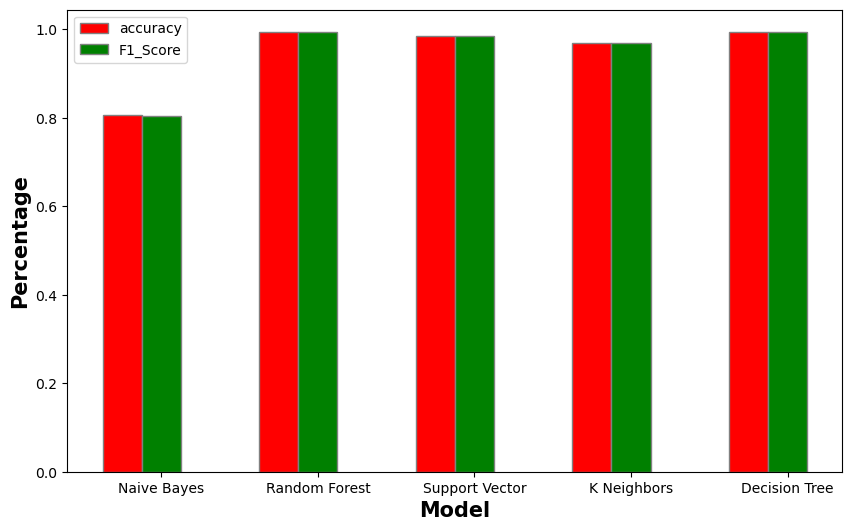

In [42]:

import numpy as np 
import matplotlib.pyplot as plt 
 
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6)) 
 
# set height of bar 
accuracy = [0.8057274550808757, 0.9941530451111775, 0.9837821689215143, 0.9679057658657334, 0.9944091161282063] 
F1_Score = [0.8038226425299025, 0.9941520050750988, 0.9837882135742965, 0.9679136660281514, 0.9944139743694288] 

 
# Set position of bar on X axis 
br1 = np.arange(len(accuracy)) 
br2 = [x + barWidth for x in br1] 
 
 
# Make the plot
plt.bar(br1, accuracy, color ='r', width = barWidth, 
        edgecolor ='grey', label ='accuracy') 
plt.bar(br2, F1_Score, color ='g', width = barWidth, 
        edgecolor ='grey', label ='F1_Score') 

 
# Adding Xticks 
plt.xlabel('Model', fontweight ='bold', fontsize = 15) 
plt.ylabel('Percentage', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(accuracy))], 
        ['Naive Bayes', 'Random Forest', 'Support Vector', 'K Neighbors', 'Decision Tree'])
 
plt.legend()
plt.show() 

# Part III: Test

### Entering hypothetical titles to predict the category

In [44]:
titles = pd.read_csv('test_category.csv', header=None)
print(titles[0])

0        Ultimate Car Restoration: 1967 Mustang Rebirth
1          The Journey of a Symphony: Behind the Scenes
2           Puppy's First Day Home: A Heartwarming Tale
3     Incredible Soccer Skills: Top 10 Goals of the ...
4           The Haunted Lighthouse: A Short Horror Film
5      Exploring the Hidden Gems of Bali: A Travel Vlog
6     Epic Battle Royale Gameplay: Victory Against A...
7                  Life of a Vlogger: Behind the Scenes
8        The Art of Making Friends: A Social Experiment
9     Stand-up Nights: Hilarious New Comedian on the...
10        Celebrity Interviews: The Latest in Hollywood
11      Breaking News: Major Political Shifts Explained
12          DIY Home Decor: Transform Your Space Easily
13    Revolutionizing Learning: New Educational Methods
14    The Future of AI: Discoveries That Could Chang...
15        Charity Event Highlights: Making a Difference
16        Classic Cinema Review: 'Casablanca' Revisited
17            Creating an Anime Character: Step 

### Inserting above titles into each classifier model

In [45]:
Titles_counts = vector.transform(titles[0])

### Naive Bayes Model

In [46]:
PredictNB = NB_Model.predict(Titles_counts)
PredictNB

array([ 2, 20, 24, 17,  1, 22, 20, 24, 24, 20, 24, 25, 26, 20, 27, 20,  2,
       20, 20,  1, 23, 23, 24, 22, 24, 24, 24,  1, 24, 24, 24])

### Random Forest Model

In [47]:
PredictRFC = RFC_Model.predict(Titles_counts)
PredictRFC

array([ 2, 24, 24, 24, 10, 24, 20, 22, 24, 20, 24, 22, 26, 24, 22, 28, 20,
       20, 22, 24, 20, 24, 24, 23, 24, 24, 24, 20, 10, 23, 24])

### SVC Model

In [29]:
PredictSVC = SVC_Model.predict(Titles_counts)
PredictSVC

array([ 2, 27, 24, 22,  1, 22, 17, 24, 24, 20, 24, 24, 26, 20, 27, 28, 20,
       22, 24, 24, 23, 24, 24, 24, 20, 24, 24, 20, 24, 23, 24])

### K Neighbors Model

In [ ]:
PredictKNC = KNC_Model.predict(Titles_counts)
PredictKNC

### Decision Tree Model

In [31]:
PredictDTC = DTC_Model.predict(Titles_counts)
PredictDTC

array([ 2, 24, 24, 24, 10, 23, 20, 27, 24, 24, 24, 10, 26, 24, 24, 28, 20,
       20, 28, 24, 23, 23, 24, 23, 26, 24, 24, 28, 24, 23,  1])

### Output will be an array of numbers. Iterate through the Category Dictionary (from JSON file) to find "title"

In [49]:
CategoryNamesListNB = []
for Category_ID in PredictNB:
    MatchingCategoriesNB = [x for x in category_dict if x["id"] == str(Category_ID)]
    if MatchingCategoriesNB:
        CategoryNamesListNB.append(MatchingCategoriesNB[0]["title"])

In [50]:
CategoryNamesListRFC = []
for Category_ID in PredictRFC:
    MatchingCategoriesRFC = [x for x in category_dict if x["id"] == str(Category_ID)]
    if MatchingCategoriesRFC:
        CategoryNamesListRFC.append(MatchingCategoriesRFC[0]["title"])

In [34]:
CategoryNamesListSVC = []
for Category_ID in PredictSVC:
    MatchingCategoriesSVC = [x for x in category_dict if x["id"] == str(Category_ID)]
    if MatchingCategoriesSVC:
        CategoryNamesListSVC.append(MatchingCategoriesSVC[0]["title"])

In [35]:
CategoryNamesListKNC = []
for Category_ID in PredictKNC:
    MatchingCategoriesKNC = [x for x in category_dict if x["id"] == str(Category_ID)]
    if MatchingCategoriesKNC:
        CategoryNamesListKNC.append(MatchingCategoriesKNC[0]["title"])

In [36]:
CategoryNamesListDTC = []
for Category_ID in PredictDTC:
    MatchingCategoriesDTC = [x for x in category_dict if x["id"] == str(Category_ID)]
    if MatchingCategoriesDTC:
        CategoryNamesListDTC.append(MatchingCategoriesDTC[0]["title"])

### Mapping these values to the Titles we want to Predict

In [51]:
TitleDataFrameNB = []
for i in range(0, len(titles[0])):
    TitleToCategoriesNB = {'Title': titles[0][i],  'Category': CategoryNamesListNB[i]}
    TitleDataFrameNB.append(TitleToCategoriesNB)

In [52]:
TitleDataFrameRFC = []
for i in range(0, len(titles[0])):
    TitleToCategoriesRFC = {'Title': titles[0][i],  'Category': CategoryNamesListRFC[i]}
    TitleDataFrameRFC.append(TitleToCategoriesRFC)

In [39]:
TitleDataFrameSVC = []
for i in range(0, len(titles[0])):
    TitleToCategoriesSVC = {'Title': titles[0][i],  'Category': CategoryNamesListSVC[i]}
    TitleDataFrameSVC.append(TitleToCategoriesSVC)

In [40]:
TitleDataFrameKNC = []
for i in range(0, len(titles[0])):
    TitleToCategoriesKNC = {'Title': titles[0][i],  'Category': CategoryNamesListKNC[i]}
    TitleDataFrameKNC.append(TitleToCategoriesKNC)

In [41]:
TitleDataFrameDTC = []
for i in range(0, len(titles[0])):
    TitleToCategoriesDTC = {'Title': titles[0][i],  'Category': CategoryNamesListDTC[i]}
    TitleDataFrameDTC.append(TitleToCategoriesDTC)

### Converting the resulting Dictionary to a Data Frame

In [53]:
PredictDFnb = pd.DataFrame(PredictNB)
TitleDFnb = pd.DataFrame(TitleDataFrameNB)
PreFinalDFnb = pd.concat([PredictDFnb, TitleDFnb], axis=1)
PreFinalDFnb.columns = (['Categ_ID', 'Predicted Category', 'Hypothetical Video Title'])
FinalDFnb = PreFinalDFnb.drop(['Categ_ID'],axis=1)
colsNB = FinalDFnb.columns.tolist()
colsNB = colsNB[-1:] + colsNB[:-1]
FinalDFnb= FinalDFnb[colsNB]

In [54]:
PredictDFrfc = pd.DataFrame(PredictRFC)
TitleDFrfc = pd.DataFrame(TitleDataFrameRFC)
PreFinalDFrfc = pd.concat([PredictDFrfc, TitleDFrfc], axis=1)
PreFinalDFrfc.columns = (['Categ_ID', 'Predicted Category', 'Hypothetical Video Title'])
FinalDFrfc = PreFinalDFrfc.drop(['Categ_ID'],axis=1)
colsRFC = FinalDFrfc.columns.tolist()
colsRFC = colsRFC[-1:] + colsRFC[:-1]
FinalDFrfc= FinalDFrfc[colsRFC]

In [44]:
PredictDFsvc = pd.DataFrame(PredictSVC)
TitleDFsvc = pd.DataFrame(TitleDataFrameSVC)
PreFinalDFsvc = pd.concat([PredictDFsvc, TitleDFsvc], axis=1)
PreFinalDFsvc.columns = (['Categ_ID', 'Predicted Category', 'Hypothetical Video Title'])
FinalDFsvc = PreFinalDFsvc.drop(['Categ_ID'],axis=1)
colsSVC = FinalDFsvc.columns.tolist()
colsSVC = colsSVC[-1:] + colsSVC[:-1]
FinalDFsvc= FinalDFsvc[colsSVC]

In [45]:
PredictDFknc = pd.DataFrame(PredictKNC)
TitleDFknc = pd.DataFrame(TitleDataFrameKNC)
PreFinalDFknc = pd.concat([PredictDFknc, TitleDFknc], axis=1)
PreFinalDFknc.columns = (['Categ_ID', 'Predicted Category', 'Hypothetical Video Title'])
FinalDFknc = PreFinalDFknc.drop(['Categ_ID'],axis=1)
colsKNC = FinalDFknc.columns.tolist()
colsKNC = colsKNC[-1:] + colsKNC[:-1]
FinalDFknc= FinalDFknc[colsKNC]

In [46]:
PredictDFdtc = pd.DataFrame(PredictDTC)
TitleDFdtc = pd.DataFrame(TitleDataFrameDTC)
PreFinalDFdtc = pd.concat([PredictDFdtc, TitleDFdtc], axis=1)
PreFinalDFdtc.columns = (['Categ_ID', 'Predicted Category', 'Hypothetical Video Title'])
FinalDFdtc = PreFinalDFdtc.drop(['Categ_ID'],axis=1)
colsDTC = FinalDFdtc.columns.tolist()
colsDTC = colsDTC[-1:] + colsDTC[:-1]
FinalDFdtc= FinalDFdtc[colsDTC]

### Viewing the Final Prediction Results

In [55]:
# Naive Bayes 
FinalDFnb

,Hypothetical Video Title,Predicted Category
0,Autos & Vehicles,Ultimate Car Restoration: 1967 Mustang Rebirth
1,Gaming,The Journey of a Symphony: Behind the Scenes
2,Entertainment,Puppy's First Day Home: A Heartwarming Tale
3,Sports,Incredible Soccer Skills: Top 10 Goals of the ...
4,Film & Animation,The Haunted Lighthouse: A Short Horror Film
5,People & Blogs,Exploring the Hidden Gems of Bali: A Travel Vlog
6,Gaming,Epic Battle Royale Gameplay: Victory Against A...
7,Entertainment,Life of a Vlogger: Behind the Scenes
8,Entertainment,The Art of Making Friends: A Social Experiment
9,Gaming,Stand-up Nights: Hilarious New Comedian on the...


In [56]:
# Random Forest
FinalDFrfc

,Hypothetical Video Title,Predicted Category
0,Autos & Vehicles,Ultimate Car Restoration: 1967 Mustang Rebirth
1,Entertainment,The Journey of a Symphony: Behind the Scenes
2,Entertainment,Puppy's First Day Home: A Heartwarming Tale
3,Entertainment,Incredible Soccer Skills: Top 10 Goals of the ...
4,Music,The Haunted Lighthouse: A Short Horror Film
5,Entertainment,Exploring the Hidden Gems of Bali: A Travel Vlog
6,Gaming,Epic Battle Royale Gameplay: Victory Against A...
7,People & Blogs,Life of a Vlogger: Behind the Scenes
8,Entertainment,The Art of Making Friends: A Social Experiment
9,Gaming,Stand-up Nights: Hilarious New Comedian on the...


In [49]:
# SVC
FinalDFsvc

,Hypothetical Video Title,Predicted Category
0,Autos & Vehicles,Ultimate Car Restoration: 1967 Mustang Rebirth
1,Education,The Journey of a Symphony: Behind the Scenes
2,Entertainment,Puppy's First Day Home: A Heartwarming Tale
3,People & Blogs,Incredible Soccer Skills: Top 10 Goals of the ...
4,Film & Animation,The Haunted Lighthouse: A Short Horror Film
5,People & Blogs,Exploring the Hidden Gems of Bali: A Travel Vlog
6,Sports,Epic Battle Royale Gameplay: Victory Against A...
7,Entertainment,Life of a Vlogger: Behind the Scenes
8,Entertainment,The Art of Making Friends: A Social Experiment
9,Gaming,Stand-up Nights: Hilarious New Comedian on the...


In [50]:
# K Neighbors
FinalDFknc

,Hypothetical Video Title,Predicted Category
0,Entertainment,Ultimate Car Restoration: 1967 Mustang Rebirth
1,Sports,The Journey of a Symphony: Behind the Scenes
2,Music,Puppy's First Day Home: A Heartwarming Tale
3,Music,Incredible Soccer Skills: Top 10 Goals of the ...
4,People & Blogs,The Haunted Lighthouse: A Short Horror Film
5,People & Blogs,Exploring the Hidden Gems of Bali: A Travel Vlog
6,Sports,Epic Battle Royale Gameplay: Victory Against A...
7,Film & Animation,Life of a Vlogger: Behind the Scenes
8,Comedy,The Art of Making Friends: A Social Experiment
9,People & Blogs,Stand-up Nights: Hilarious New Comedian on the...


In [51]:
# Decision Trees
FinalDFdtc

,Hypothetical Video Title,Predicted Category
0,Autos & Vehicles,Ultimate Car Restoration: 1967 Mustang Rebirth
1,Entertainment,The Journey of a Symphony: Behind the Scenes
2,Entertainment,Puppy's First Day Home: A Heartwarming Tale
3,Entertainment,Incredible Soccer Skills: Top 10 Goals of the ...
4,Music,The Haunted Lighthouse: A Short Horror Film
5,Comedy,Exploring the Hidden Gems of Bali: A Travel Vlog
6,Gaming,Epic Battle Royale Gameplay: Victory Against A...
7,Education,Life of a Vlogger: Behind the Scenes
8,Entertainment,The Art of Making Friends: A Social Experiment
9,Entertainment,Stand-up Nights: Hilarious New Comedian on the...
